In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pycromanager import Core
core = Core()
from pycromanager import Acquisition, multi_d_acquisition_events, XYTiledAcquisition, MagellanAcquisition

Exception in thread BridgeSocketThread_port4827:
Traceback (most recent call last):
  File "C:\Users\Admin\.conda\envs\microscope\lib\site-packages\pyjavaz\bridge.py", line 341, in _run_socket_thread
    raise Exception(f"Socket timed out after {self._timeout} milliseconds")
Exception: Socket timed out after 1000 milliseconds

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\.conda\envs\microscope\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\Admin\.conda\envs\microscope\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\Admin\.conda\envs\microscope\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Admin\.conda\envs\microscope\lib\site-packages\pyjavaz\bridge.py", line 357, in _run_socket_thread
    self.close()
  File "C:\Users\Admin\.conda\envs\microscope\lib\s

Exception: Couldn't create Core. Is Micro-Manager running and is the ZMQ server on 4827 option enabled?

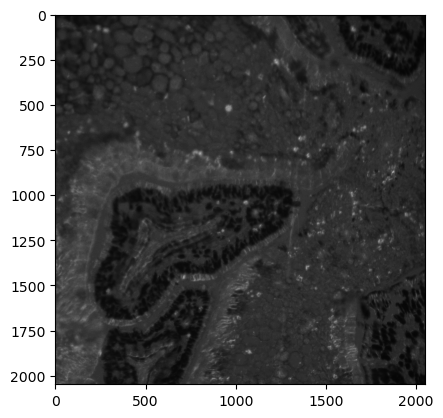

In [2]:
with Acquisition(directory=r'C:\Desktop\test_files', name='acquisition_name') as acq:
    events = multi_d_acquisition_events(num_time_points=5)
    acq.acquire(events)
    
dataset = acq.get_dataset()
img = dataset.read_image(time=0)

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

In [7]:
-973.2+field

225.81760000000008

In [5]:
field = 0.5924 * 2024
x = np.array([-973.2, -973.2+field]) #np.arange(0, 5)
y = np.array([11989.3, 11989.3+field]) #np.arange(0, 5)
xy = np.hstack([x[:, None], y[:, None]])

with Acquisition(directory=r'C:\Desktop\test_files', name='acquisition_name') as acq:
    events = multi_d_acquisition_events(xy_positions=xy)
    acq.acquire(events)
    
dataset = acq.get_dataset()

In [6]:
img = dataset.read_image(x=-973.2, y=11989.3)

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

Exception: image with keys frozenset({('y', 11989.3), ('x', -973.2)}) not present in data set

In [ ]:
with Acquisition(directory=r'\Desktop\test_files', name='multi_d') as acq:
    # create one event for the image at each z-slice
    events = []
    for index, z_um in enumerate(np.arange(start=0, stop=10, step=0.5)):
        evt = {
                # 'axes' is required. It is used by the image viewer and data storage to
                # identify the acquired image
                'axes': {'z': index},

                # the 'z' field provides the z position in µm
                'z': z_um
                }
        events.append(evt)

    acq.acquire(events)

In [11]:
field = 0.5924 * 2024
x_positions = [-973.2, -973.2+field]
y_positions = [11989.3, 11989.3+field]

In [ ]:
with XYTiledAcquisition(directory=r'\Desktop\test_files', name='multi_tile', tile_overlap=10) as acq:
    #10 pixel overlap between adjacent tiles

    #acquire a 2 x 2 grid
    events = []
    for x_s in range(len(x_positions)):
        for y_s in range(len(y_positions)):
            evt = {'x': x_positions[x_s], 'y': y_positions[y_s]}
            events.append(evt)
    acq.acquire(events)
    
#dataset = acq.get_dataset()
#img00 = dataset.read_image(row=0, col=0)
#img01 = dataset.read_image(row=1, col=0)


In [ ]:
# no need to use the normal "with" syntax because these acquisition are cleaned up automatically
acq = MagellanAcquisition(magellan_acq_index=0)

# Or do this to launch an explore acquisition
acq = MagellanAcquisition(magellan_explore=True)

# Optional: block here until the acquisition is finished
acq.await_completion()

In [15]:
print(dataset.axes)

{'time': SortedSet([0, 1, 2, 3, 4])}


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img00, cmap='gray')
ax[1].imshow(img01, cmap='gray')

In [ ]:
#### Calling core functions ###
exposure = core.get_exposure()

#### Setting and getting properties ####
#Here we set a property of the core itself, but same code works for device properties
auto_shutter = core.get_property('Core', 'AutoShutter')
core.set_property('Core', 'AutoShutter', 0)

#### Acquiring images ####
#The micro-manager core exposes several mechanisms foor acquiring images. In order to
#not interfere with other pycromanager functionality, this is the one that should be used
core.snap_image()
tagged_image = core.get_tagged_image()
#If using micro-manager multi-camera adapter, use core.getTaggedImage(i), where i is
#the camera index

#pixels by default come out as a 1D array. We can reshape them into an image
pixels = np.reshape(tagged_image.pix,
                    newshape=[tagged_image.tags['Height'],
                              tagged_image.tags['Width']])
#plot it
plt.imshow(pixels, cmap='gray')
plt.show()

### Multi D Acqusition

In [12]:
x = np.arange(0, 5)
y = np.arange(0, -5, -1)

xy = np.hstack([x[:, None], y[:, None]])
print(xy)

[[ 0  0]
 [ 1 -1]
 [ 2 -2]
 [ 3 -3]
 [ 4 -4]]


In [11]:
multi_d_acquisition_events(xy_positions=xy)

[{'axes': {'position': 0}, 'x': 0, 'y': 0},
 {'axes': {'position': 1}, 'x': 1, 'y': -1},
 {'axes': {'position': 2}, 'x': 2, 'y': -2},
 {'axes': {'position': 3}, 'x': 3, 'y': -3},
 {'axes': {'position': 4}, 'x': 4, 'y': -4}]

In [13]:
z = np.arange(0, 5)
xyz = np.hstack([x[:, None], y[:, None], z[:, None]])
multi_d_acquisition_events(xyz_positions=xyz)

[{'axes': {'position': 0, 'z': 0}, 'x': 0, 'y': 0, 'z': 0},
 {'axes': {'position': 1, 'z': 0}, 'x': 1, 'y': -1, 'z': 1},
 {'axes': {'position': 2, 'z': 0}, 'x': 2, 'y': -2, 'z': 2},
 {'axes': {'position': 3, 'z': 0}, 'x': 3, 'y': -3, 'z': 3},
 {'axes': {'position': 4, 'z': 0}, 'x': 4, 'y': -4, 'z': 4}]

In [9]:
#get object representing micro-magellan API
from pycromanager import Bridge
magellan = core.get_magellan()


ImportError: cannot import name 'Bridge' from 'pycromanager' (C:\Users\Admin\.conda\envs\test\lib\site-packages\pycromanager\__init__.py)

In [ ]:
#get the first acquisition appearing in the magellan acquisitions list
acq_settings = magellan.get_acquisition_settings(0)

#add a new one to the list
magellan.create_acquisition_settings()
#remove the one you just added
magellan.remove_acquisition_settings(1)

#Edit the acquisition's settings (i.e. same thing as the controls in the magellan GUI)
#Below is a comprhensive list of all possible settings that be changed. In practice
#only a subset of them will need to be explicitly called

#saving name and path
acq_settings.set_acquisition_name('experiment_1')
acq_settings.set_saving_dir('{}path{}to{}dir'.format(os.sep, os.sep, os.sep))
acq_settings.set_tile_overlap_percent(5)

#time settings
acq_settings.set_time_enabled(True)
acq_settings.set_time_interval(9.1, 's')  # 'ms', 's', or 'min'
acq_settings.set_num_time_points(20)

#channel settings
acq_settings.set_channel_group('Channel')
acq_settings.set_use_channel('DAPI', False)  #channel_name, use
acq_settings.set_channel_exposure('DAPI', 5.0)  #channel_name, exposure in ms
acq_settings.set_channel_z_offset('DAPI', -0.5)  #channel_name, offset in um

#space settings
# '3d_cuboid', '3d_between_surfaces', '3d_distance_from_surface', '2d_flat', '2d_surface'
acq_settings.set_acquisition_space_type('3d_cuboid')
acq_settings.set_xy_position_source('New Surface 1')
acq_settings.set_z_step(4.5)
acq_settings.set_surface('New Surface 1')
acq_settings.set_bottom_surface('New Surface 1')
acq_settings.set_top_surface('New Surface 1')
acq_settings.set_z_start(4.1)
acq_settings.set_z_end(10.1)



In [ ]:
event = {
      # A dictionary with the positions along various axes (e.g. time point index,
      # z-slice index, etc.).
      'axes': {
              # Axis names can be any string
              'axis1_name': 1,

              # They can take integer or string values
              'axis2_name': 'first_position',

              # "channel" is a special axis name which will lead to different positions being
              # overlayed in different colors in the image viewer
              'channel': 'DAPI',

              # If an XYTiledAcquisition is being used, "row" and "column" are special
              # values that the acquisition engine will convert into stage coordinates,
              # laying out the acquired images in a grid
              'row': 1,
              'column': 0,

              },

      # Config groups can be used to control groups of properties
      'config_group': ['name_of_config_group', 'name_of_preset'],

      'exposure': 10.6, # exposure time in ms

      # Z stages
      # The 'z' field controls the default z stage device (i.e. the Core-Focus device)
      'z': 123.45, # the z position in um

      # Alternatively the device can be specified by name, or multiple devices can
      # be controlled by providing their names and positions in um
      'stage_positions':
                      [['z_stage1_name': 12.34],
                      ['z_stage2_name': 1234.566]],


      # For timelapses: how long to wait before starting next time point in s
      'min_start_time': 100

      # For XY stages
      'x': 123.4, # positions in um
      'y': 567.8,



      # If using a camera other than the 'Core-camera', it can be specified by name here
      'camera': 'a_camera_device_name',


      # Other arbitrary hardware settings can be encoded in a list of strings with
      # each entry containing the name of the device, the name of the property,
      # and the value of the property
      'properties': [['DeviceName', 'PropertyName', 'PropertyValue'],
              ['OtherDeviceName', 'OtherPropertyName', 'OtherPropertyValue']],


      # Custom metadata can be added to the event, which will be added to the metadata
      # of the resultant image under the 'tags' key
      'tags': {
              'whatever_you_want_here': 54,
              'something_else': 'here'}


      }